In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import pyowm
import time

In [2]:
with open('owm-api-key.txt', 'r') as key_file:
    key = key_file.read()

owm = pyowm.OWM(key)

In [3]:
observation = owm.weather_at_place('London,GB')
w = observation.get_weather()
print(w)

<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:20:00+00, status=clear, detailed status=clear sky>


In [4]:
w.get_wind()

{u'deg': 210, u'speed': 5.7}

In [5]:
w.get_humidity()

87

In [6]:
w.get_temperature('celsius')

{'temp': 7.1, 'temp_kf': None, 'temp_max': 8.0, 'temp_min': 5.0}

In [7]:
dic = owm.city_id_registry()
londons = dic.locations_for('London')

londons_ids = []

for london in londons:
    londons_ids.append(london.get_ID())
    
londons_ids

[2643743, 4119617, 4298960, 4517009, 5056033, 5367815, 6058560]

In [8]:
observation_list = owm.weather_at_ids(londons_ids)

for obs in observation_list:
    print(obs.get_weather())

<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=clear, detailed status=sky is clear>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=clouds, detailed status=overcast clouds>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=rain, detailed status=light rain>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=mist, detailed status=mist>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=clear, detailed status=sky is clear>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=clouds, detailed status=few clouds>
<pyowm.webapi25.weather.Weather - reference time=2018-11-30 19:42:29+00, status=mist, detailed status=mist>


In [9]:
cities = pd.read_csv("cities.csv", ',')
valid_cities = []

In [10]:
for index, row in cities.iterrows():
    lookup = dic.locations_for(row['City'])
    if lookup==[]:
        print(row['City'])
    else:
        valid_cities.append(lookup[0])

Friburg
Wurzburg
Rotthalmuenster
Munchen
Ratisbon
Nurnberg
Klitzschen bei Torga
Frankfurt


D:\Apps\Programs\Anaconda2\lib\site-packages\pyowm\webapi25\cityidregistry.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  'nocase': lambda city_name, toponym: city_name.lower() == toponym.lower(),


Münster
Nekhel
Wadi El Natroon
Dabaa
Sollum
Djerba Mellita
Sfax El-Maou
Enfidha Hammamet
Kelibia
Tinfouye
In Salah
Ain Hadjaj
Rhourd Nouss
Beni Abbes
Hassi-Messaoud
Ghardaia
Hassir'Mel
Elbayadh
Laghoua
Bou-Saada
Khenchella
Alger
Tenes
Nouasseur
Chefchaouen
Makko
Guriat
Turaif
Ma'An
Ghor El Safi
Mafraq
Tel-Aviv
Beyrouth
Lattakia
Hassakah
Kamishli
Erevan
Tbilissi
Zestafoni
Wladikavkaz
Nal'Cik
Kizljar
Majkop
Taipak
Chapaevo
Uralsk
Sorocinsk
Bol'Saja Gluscica
Astrahan
Jaskul
Tihoreck
Primorsko-Ahtarsk
Ganjushkino
Remontnoe
Ejsk
Novyj Ushtogan
Malye Derbety
Kotel'Nikovo
Zaporizhzhia
Verhnij Baskuncak
Nizhny-Chir
Dnipropetrovs'K
Bokovskaja
Izium
Aleksandrov-Gaj
Bogucar
Valujki
Krasnyj Kut
Kalac
Urjupinsk
Belgorod (Ru)
Ersov (Ru)
Oktjabr'Skij Gorodok
Balasov
Bogoroditskoe Fenin
Pugacev
Rtiscevo
Zerdevka
Ai-Petri
Chornomors'Ke
Odesa
Kryvyi Rih
Liubashivka
Mohyliv-Podilskyi
Vinnytsia
Khmel'Nytskyi
Volodymyr-Volynskyi
Homiel
Mozyr
Sarlyk
Bugul'Ma
Celno-Versiny
Musljumovo
Vjatskie Poljany
Ekateri

In [11]:
valid_cities

[<pyowm.webapi25.location.Location - id=2924585, name=Friedrichshafen, lon=9.48333, lat=47.650002>,
 <pyowm.webapi25.location.Location - id=2825297, name=Stuttgart, lon=9.17702, lat=48.782318>,
 <pyowm.webapi25.location.Location - id=2853969, name=Pforzheim, lon=8.7, lat=48.883331>,
 <pyowm.webapi25.location.Location - id=2939797, name=Crailsheim, lon=10.07193, lat=49.134441>,
 <pyowm.webapi25.location.Location - id=2820256, name=Ulm, lon=9.99155, lat=48.398411>,
 <pyowm.webapi25.location.Location - id=2871992, name=Memmingen, lon=10.18527, lat=47.983719>,
 <pyowm.webapi25.location.Location - id=2954172, name=Augsburg, lon=10.88333, lat=48.366669>,
 <pyowm.webapi25.location.Location - id=2951825, name=Bayreuth, lon=11.57833, lat=49.948059>,
 <pyowm.webapi25.location.Location - id=2803560, name=Zwickau, lon=12.5, lat=50.73333>,
 <pyowm.webapi25.location.Location - id=2940132, name=Chemnitz, lon=12.91667, lat=50.833328>,
 <pyowm.webapi25.location.Location - id=2879139, name=Leipzig, lon=

In [12]:
lon = []
lat = []
for city in valid_cities:
    lon.append(city.get_lon())
    lat.append(city.get_lat())

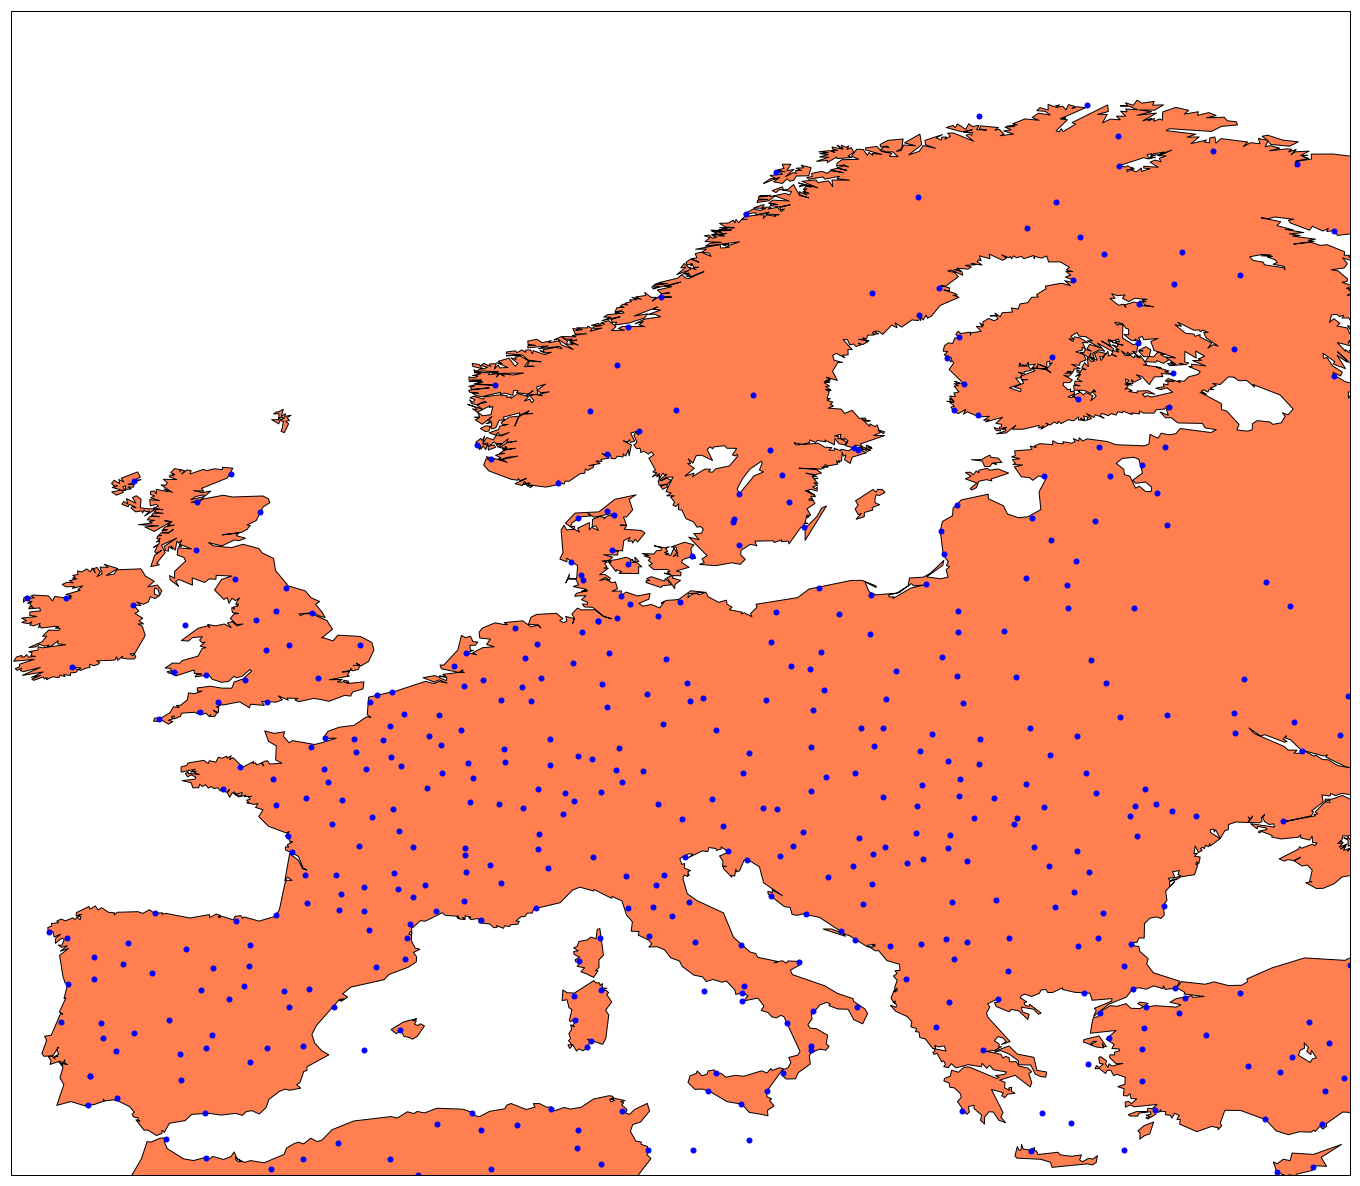

In [13]:
plt.figure(figsize=(24,24))
map = Basemap(llcrnrlon=-10.56,llcrnrlat=34.65,urcrnrlon=34.88,urcrnrlat=74.17, resolution = 'l', epsg=4668)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='coral',lake_color='white')
map.drawcoastlines()
x, y = map(lon, lat)
map.plot(x, y, 'bo', markersize=5)



In [15]:
ids = []
for city in valid_cities:
    ids.append(city.get_ID())
    

In [29]:
ids

[2924585,
 2825297,
 2853969,
 2939797,
 2820256,
 2871992,
 2954172,
 2951825,
 2803560,
 2940132,
 2879139,
 2929670,
 2874545,
 2158777,
 2894003,
 2660123,
 2892518,
 2946447,
 2934246,
 2871845,
 2950158,
 2935517,
 2949186,
 2910831,
 2944387,
 2911298,
 2891122,
 2844588,
 3247449,
 2923822,
 359678,
 359796,
 360630,
 2167618,
 358619,
 1023365,
 352733,
 2467783,
 2464701,
 2468018,
 2465840,
 2473572,
 2464795,
 2473634,
 2270985,
 2508813,
 2476403,
 2498305,
 2505530,
 2507943,
 2497411,
 2489865,
 2500017,
 2503826,
 2490584,
 2481007,
 2491335,
 2483668,
 1261037,
 2481700,
 2501152,
 2502958,
 2505329,
 2506999,
 2519582,
 2549340,
 2542227,
 2555742,
 2553604,
 2542715,
 2538474,
 2529313,
 2558545,
 101628,
 250774,
 250441,
 294801,
 2210247,
 170654,
 1854585,
 616635,
 615532,
 610824,
 558118,
 483873,
 584243,
 571306,
 522377,
 582182,
 609965,
 2697944,
 485698,
 557413,
 466135,
 462522,
 561499,
 484907,
 545277,
 2510083,
 472757,
 526558,
 513042,
 562389,
 

In [53]:
observation_list = []
id20s = []
elt_id20 = []
c = 0
for c in range(0, len(ids)):
    elt_id20.append(ids[c])
    if len(elt_id20) == 20 or c == len(ids)-1:
        id20s.append(elt_id20)
        elt_id20 = []
    c = c + 1

for id20 in id20s:
    observation_list.append(owm.weather_at_ids(id20))
    time.sleep(1)


In [54]:
observation_list

[[<pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:48+00>,
  <pyowm.webapi25.observation.Observation - reception time=2018-11-30 20:25:

In [55]:
weathers = []
for obss in observation_list:
    for obs in obss:
        weathers.append(obs.get_weather())

In [56]:
weathers

[<pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=rain, detailed status=light rain>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00, status=snow, detailed status=heavy snow>,
 <pyowm.webapi25.weather.Weather - reference time=2018-11-30 20:25:49+00

In [57]:
temps = []
for weather in weathers:
    temps.append(weather.get_temperature(unit='celsius'))

In [58]:
temps[0]['temp']

5.74

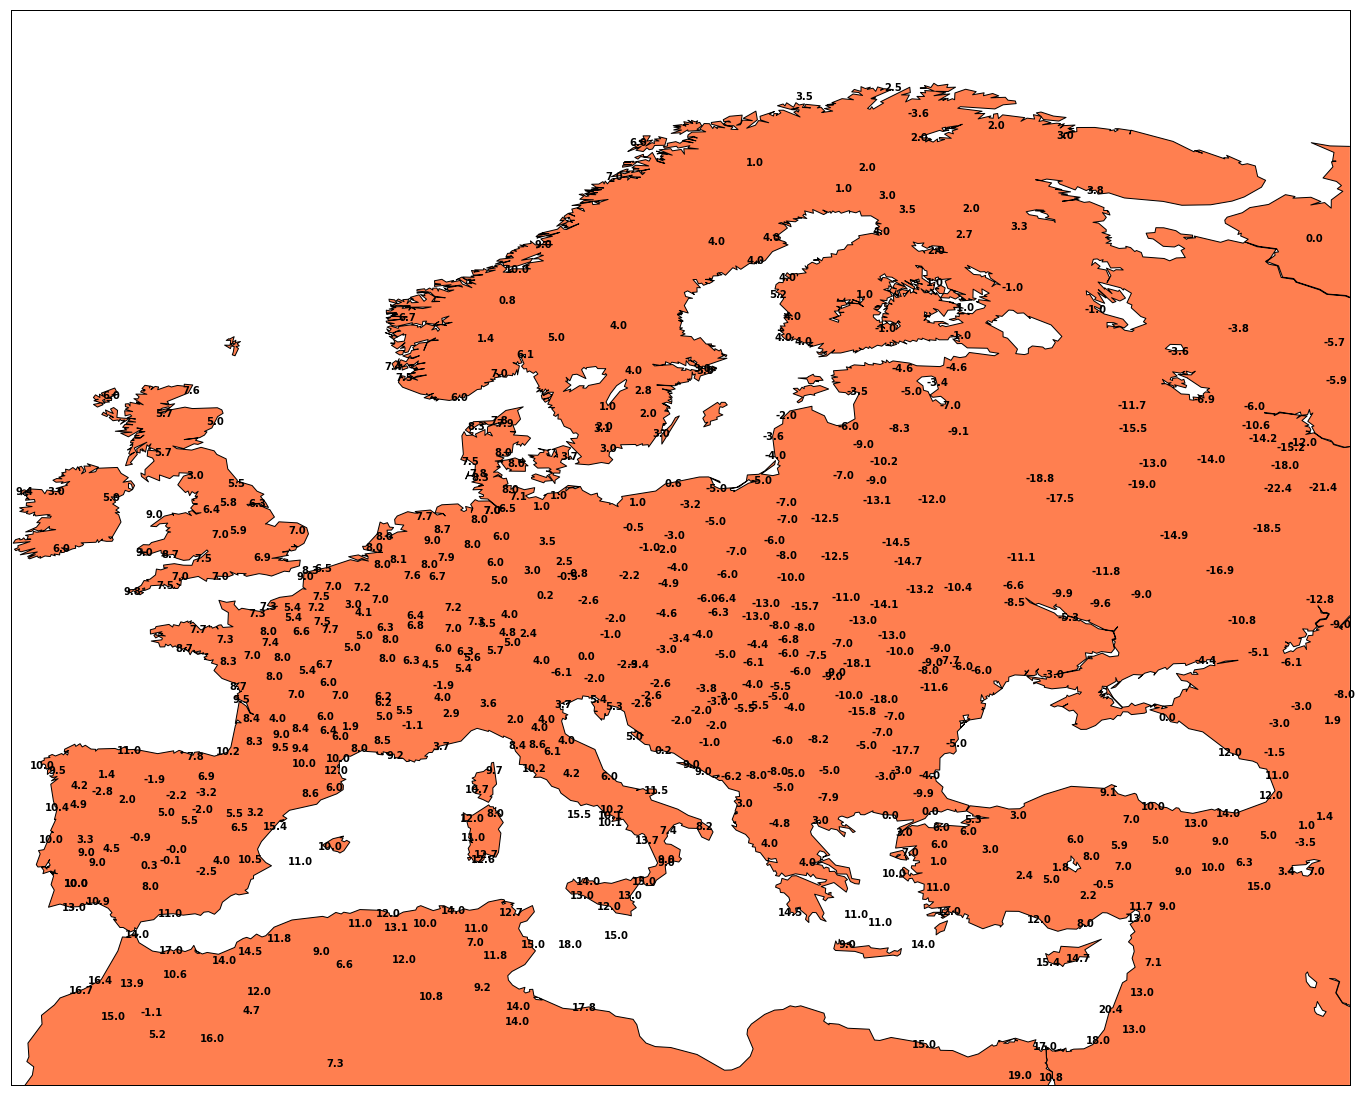

In [63]:
lon_min = -10.56
lat_min = 29.65
lon_max = 44.88
lat_max = 74.17


plt.figure(figsize=(24,24))
map = Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max, resolution = 'l', epsg=4668)
map.drawmapboundary(fill_color='white')
map.fillcontinents(color='coral',lake_color='white')
map.drawcoastlines()
x, y = map(lon, lat)
for i in range(0,len(x)-1):
    if lon[i] > lon_min and lon[i] < lon_max and lat[i] > lat_min and lat[i] < lat_max:
        plt.text(x[i], y[i], "{0:.1f}".format(temps[i]['temp']),fontsize=10,fontweight='bold', ha='center',va='center',color='k')
    

In [50]:
len(lon)

654

In [51]:
len(lat)

654

In [52]:
len(temps)

640